
-v0 representa la velocidad inicial del proyectil

-theta representa el angulo de inclinacion con el que se lanza el proyectil

-m es la masa del proyectil

-c es la constante de resistencia al aire del proyectil

-g es el valor de la graverdad que a mi me enseñaron que es 9.82 aunque podria ser 10

-dt o delta tiempo representa el movimiento en el tiempo del proyectil

## Simulación de Trayectorias y Generación de Datos 1

### Esta celda define una función para simular la trayectoria de un proyectil lanzado bajo la influencia de la gravedad y la resistencia del aire, y luego genera un conjunto de datos basado en diferentes condiciones iniciales.

### Pasos:

#### Importación de librerías:

Se importan numpy y pandas para trabajar con datos numéricos y gestionar los datos en formato de tabla, respectivamente.
#### Función simulate_trajectory:

##### Argumentos:
v0 (velocidad inicial), theta (ángulo de lanzamiento), m (masa del proyectil), c (constante de resistencia), g (gravedad) y dt (incremento de tiempo).
##### Proceso:
Convierte el ángulo de lanzamiento de grados a radianes.
Calcula las componentes de la velocidad inicial (vx, vy).

Inicializa las posiciones (x, y) y calcula las aceleraciones ax y ay por la resistencia del aire y la gravedad.

Actualiza las velocidades y posiciones en cada iteración y guarda puntos de la trayectoria, mientras la posición y sea positiva.

Resultado: Devuelve una lista de puntos de la trayectoria.
#### Generación de datos:

Se establece una semilla aleatoria para garantizar reproducibilidad.

Se generan 5000 muestras de condiciones iniciales aleatorias (velocidad, ángulo, masa, constante de resistencia).

Se simulan trayectorias para cada conjunto de condiciones y se almacenan los resultados en un DataFrame de pandas con las columnas: velocidad, ángulo, masa, resistencia, tiempo, x y y.

El dataset es guardado como un archivo CSV (DataTrayectoria.csv).

In [ ]:
import numpy as np
import pandas as pd


def simulate_trajectory(v0, theta, m, c, g=9.82, dt=0.01):
    theta_rad = np.radians(theta)

    vx, vy = v0 * np.cos(theta_rad), v0 * np.sin(theta_rad)
    #Se establece el punto inicial en 0,0 para cada punto

    x, y = 0, 0
    trajectory = []
    step = 0  # Contador de pasos
    #Aqui solo es aplicar matematica 
    while y >= 0:
        ax = -c/m * vx
        ay = -g - (c/m * vy)
        
        vx += ax * dt
        vy += ay * dt
        
        x += vx * dt
        y += vy * dt
        if step % 10 == 0 or y <= 0:  # También guardar el punto final
            trajectory.append((x, y))
        step += 1
    return trajectory

# Generar datos
np.random.seed(69)
data = []
for i in range(5000):
    v0 = np.random.uniform(10, 100)
    theta = np.random.uniform(10, 80)
    m = np.random.uniform(0.1, 5)
    c = np.random.uniform(0.01, 0.5)
    traj = simulate_trajectory(v0, theta, m, c)
    for t, (x, y) in enumerate(traj):  # Guardar solo los puntos seleccionados
        data.append([v0, theta, m, c, t * 0.01, x, y])

df = pd.DataFrame(data, columns=['v0', 'theta', 'm', 'c', 'Tiempo', 'x', 'y'])
df.to_csv('DataTrayectoria.csv', index=False)


## Simulación de Trayectorias y Generación de Datos 2
### Esta celda mejora la simulación de la trayectoria de un proyectil añadiendo la opción de especificar el número exacto de puntos a recolectar en la trayectoria y simula múltiples trayectorias para un número mayor de lanzamientos.

### Pasos:

#### Función simulate_trajectory:

##### Argumentos:
Similar a la celda anterior, pero con un argumento adicional points que especifica el número de puntos a recoger en la trayectoria.
##### Proceso:
Los pasos para calcular las aceleraciones y actualizaciones de las posiciones son los mismos que en la celda anterior.

Se asegura de recolectar un número fijo de puntos por trayectoria, incluso si la simulación termina antes de alcanzar el número deseado de puntos.

Si la trayectoria es corta, los puntos restantes se completan con la última posición de y igual a 0.
##### Resultado: Retorna una lista con los puntos de la trayectoria.
#### Generación de datos mejorados:

Se genera un conjunto de 100 lanzamientos, cada uno con 5000 puntos en la trayectoria.

Los datos se guardan en un DataFrame con las columnas: v0, theta, m, c, tiempo, x, y.

El dataset es guardado como un archivo CSV (DataTrayectoria.csv).

In [ ]:
import numpy as np
import pandas as pd

def simulate_trajectory(v0, theta, m, c, g=9.82, dt=0.01, points=200):
    theta_rad = np.radians(theta)
    vx, vy = v0 * np.cos(theta_rad), v0 * np.sin(theta_rad)
    x, y = 0, 0
    trajectory = []

    step = 0  # Contador de pasos
    total_time = 0  # Tiempo acumulado
    collected_points = 0  # Contador de puntos recopilados
    max_time = points * dt  # Tiempo máximo para 200 puntos

    while y >= 0 and collected_points < points:
        ax = -c/m * vx
        ay = -g - (c/m * vy)

        vx += ax * dt
        vy += ay * dt

        x += vx * dt
        y += vy * dt
        total_time += dt

        # Recolectar puntos a intervalos regulares
        if step % (1 // dt) == 0:  # Por ejemplo, cada 0.01s
            trajectory.append((x, y, total_time))
            collected_points += 1

        step += 1

    # Asegurarse de completar los puntos necesarios si la trayectoria es corta
    while collected_points < points:
        trajectory.append((x, max(0, y), total_time))
        collected_points += 1

    return trajectory

# Generar datos con 100 tiros y 500 puntos por tiro
np.random.seed(42)
data = []
num_shots = 100
points_per_shot = 5000

for _ in range(num_shots):  # Realizar 100 tiros
    v0 = np.random.uniform(10, 100)
    theta = np.random.uniform(10, 80)
    m = np.random.uniform(0.1, 5)
    c = np.random.uniform(0.01, 0.5)
    traj = simulate_trajectory(v0, theta, m, c, points=points_per_shot)
    for t, (x, y, time) in enumerate(traj):  # Guardar los puntos de cada tiro
        data.append([v0, theta, m, c, time, x, y])

# Crear DataFrame y exportar
df = pd.DataFrame(data, columns=['v0', 'theta', 'm', 'c', 'tiempo', 'x', 'y'])
df.to_csv('DataTrayectoria.csv', index=False)


## Simulación de Trayectorias y Generación de Datos 3
### Descripción: Esta celda se centra en mejorar la simulación de trayectorias y generar un conjunto de datos específicamente diseñado para entrenar modelos de aprendizaje automático, como redes neuronales.

### Pasos:

#### Función simulate_trajectory:

Similar a las celdas anteriores, pero ahora con una mejor documentación y enfoque en la generación de puntos equidistantes para reducir el tamaño de los datos.

Se asegura de que el número de puntos sea constante (time_steps) y equidistante a lo largo de la trayectoria.
#### Función generate_dataset:

##### Argumentos:
num_samples especifica el número de trayectorias a generar.

time_steps es el número de puntos por trayectoria.
##### Proceso:
Genera trayectorias para un número dado de muestras (5000 por defecto).

Para cada trayectoria, simula el movimiento de un proyectil con condiciones iniciales aleatorias dentro de rangos definidos (velocidad, ángulo, masa, resistencia).

Almacena los resultados en un DataFrame con las columnas: Velocidad_inicial, Angulo, Masa, Resistencia_al_Aire, Tiempo, x, y.
##### Resultado: Devuelve el DataFrame generado.
#### Generación del dataset:

Se genera un dataset con 500 muestras y 10 puntos por trayectoria.

El dataset es guardado como un archivo CSV (DataTrayectoria.csv).

In [3]:
import numpy as np
import pandas as pd

# Parámetros físicos constantes
g = 9.81  # Gravedad (m/s^2)

# Función para calcular la trayectoria
def simulate_trajectory(v0, angle, m, c, time_steps=100):
    """
    Simula la trayectoria de un proyectil bajo resistencia del aire.
    
    Args:
        v0: Velocidad inicial (m/s).
        angle: Ángulo de lanzamiento (grados).
        m: Masa del proyectil (kg).
        c: Constante de resistencia del aire.
        time_steps: Número de puntos a generar en la trayectoria.
    
    Returns:
        trajectory: Lista de puntos [(t, x, y)] de la trayectoria.
    """
    # Convertir el ángulo a radianes
    theta = np.radians(angle)

    # Componentes iniciales de velocidad
    vx = v0 * np.cos(theta)
    vy = v0 * np.sin(theta)
    
    # Inicializar variables
    x, y = 0, 0  # Posición inicial
    t = 0        # Tiempo inicial
    dt = 0.01    # Incremento de tiempo (s)
    
    trajectory = []
    
    while y >= 0:  # Continuar mientras el proyectil esté en el aire
        # Guardar el punto actual
        trajectory.append((t, x, y))
        
        # Calcular aceleraciones
        ax = -(c / m) * vx
        ay = -g - (c / m) * vy
        
        # Actualizar velocidades
        vx += ax * dt
        vy += ay * dt
        
        # Actualizar posiciones
        x += vx * dt
        y += vy * dt
        
        # Actualizar tiempo
        t += dt
    
    # Tomar puntos equidistantes para reducir el tamaño
    indices = np.linspace(0, len(trajectory) - 1, time_steps).astype(int)
    trajectory = [trajectory[i] for i in indices]
    
    return trajectory

# Generar datos de entrenamiento
def generate_dataset(num_samples=5000, time_steps=100):
    """
    Genera un conjunto de datos de trayectorias para entrenar el modelo.
    
    Args:
        num_samples: Número de lanzamientos simulados.
        time_steps: Número de puntos por trayectoria.
    
    Returns:
        DataFrame con las características de entrada y salida.
    """
    # Rango de valores para las características
    v0_range = (10, 50)  # Velocidad inicial (m/s)
    angle_range = (15, 75)  # Ángulo de lanzamiento (grados)
    mass_range = (0.1, 1)  # Masa del proyectil (kg)
    c_range = (0.01, 0.2)  # Constante de resistencia (kg/m)
    np.random.seed(17)
    data = []
    
    for _ in range(num_samples):
        # Generar características aleatorias
        v0 = np.random.uniform(*v0_range)
        angle = np.random.uniform(*angle_range)
        m = np.random.uniform(*mass_range)
        c = np.random.uniform(*c_range)
        
        # Simular la trayectoria
        trajectory = simulate_trajectory(v0, angle, m, c, time_steps)
        
        # Agregar puntos de la trayectoria al dataset
        for t, x, y in trajectory:
            data.append([v0, angle, m, c, t, x, y])
    
    # Crear un DataFrame
    columns = ['Velocidad_inicial', 'Angulo', 'Masa', 'Resistencia_al_Aire', 'Tiempo', 'x', 'y']
    df = pd.DataFrame(data, columns=columns)
    
    return df

# Generar el dataset
dataset = generate_dataset(num_samples=500, time_steps=10)  # 500 lanzamientos, 10 puntos por trayectoria

# Guardar el dataset en un archivo CSV
dataset.to_csv('DataTrayectoria.csv', index=False)


In [4]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


## Entrenamiento de un Modelo de Red Neuronal para Predecir Trayectorias
### Esta celda carga el dataset generado, preprocesa los datos, y entrena un modelo de red neuronal para predecir las posiciones (x, y) de un proyectil dado su velocidad, ángulo, masa, resistencia al aire y tiempo.

### Pasos:

#### Carga y preprocesamiento de datos:

Se carga el archivo CSV con los datos generados.

Se separan las características (X) y las etiquetas (y).

Se divide el dataset en conjuntos de entrenamiento y prueba utilizando train_test_split.

Se escalan los datos con StandardScaler para mejorar el rendimiento del modelo.
#### Definición y compilación del modelo:

Se define una red neuronal de 3 capas (Sequential) con dos capas ocultas de 64 neuronas cada una y una capa de salida con 2 neuronas (una para cada coordenada x e y).

Se utiliza la función de activación ReLU para las capas ocultas y linear para la capa de salida.

El modelo se compila con el optimizador Adam y la función de pérdida mean_squared_error (MSE).
#### Entrenamiento del modelo:

El modelo se entrena por 5000 épocas con un tamaño de lote de 32, utilizando los datos de entrenamiento y validación.

El entrenamiento proporciona el historial de la pérdida y la precisión (MAE) en cada época.
#### Evaluación del modelo:

Se predicen las trayectorias para el conjunto de prueba y se desescalan las predicciones.

Se comparan las trayectorias reales y predichas mediante gráficos.
#### Gráficos de desempeño:

Se grafican las curvas de pérdida (MSE) y MAE para ver el desempeño durante el entrenamiento.

Se grafican algunas trayectorias predichas vs reales para verificar la precisión del modelo.

Epoch 1/5000


c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6569 - mae: 0.5360 - val_loss: 0.1467 - val_mae: 0.2432
Epoch 2/5000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1075 - mae: 0.2051 - val_loss: 0.0526 - val_mae: 0.1428
Epoch 3/5000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.0468 - mae: 0.1381 - val_loss: 0.0344 - val_mae: 0.1177
Epoch 4/5000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.0296 - mae: 0.1142 - val_loss: 0.0263 - val_mae: 0.1068
Epoch 5/5000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 0.0224 - mae: 0.1012 - val_loss: 0.0214 - val_mae: 0.0990
Epoch 6/5000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.0176 - mae: 0.0905 - val_loss: 0.0185 - val_mae: 0.0902
Epoch 7/5000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 0.0158 - mae: 0.0861 - val_loss: 0.0170 - val_mae: 0.0877
Epoch 8/5000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.0141 - mae: 0.0802 - val_loss: 0.0148 - val_mae: 0.0799
Epoch 9/5000
125/125 ━━━━━━━━━━━━━━━━━━━━

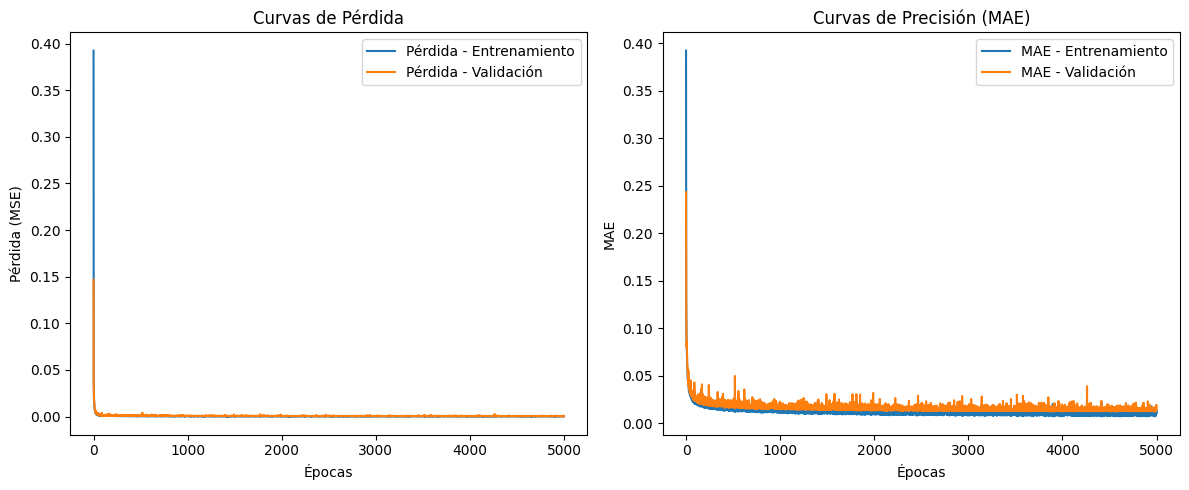

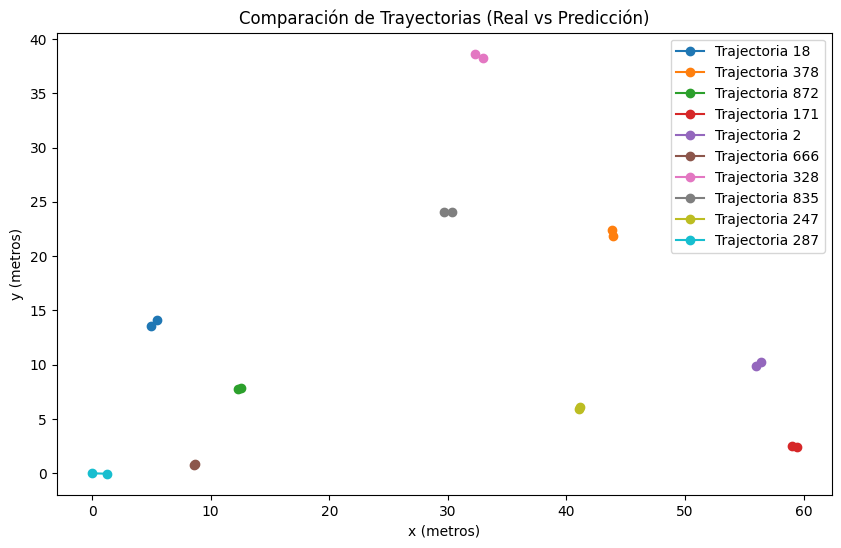

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar el dataset generado
datos = pd.read_csv('DataTrayectoria.csv')

# Separar las características (X) y etiquetas (y)
X = datos[['Velocidad_inicial', 'Angulo', 'Masa', 'Resistencia_al_Aire', 'Tiempo']].values
y = datos[['x', 'y']].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Crear el modelo de red neuronal
model = Sequential()

# Agregar capas
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='linear'))  # Salida con dos valores: x, y

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo
history = model.fit(
    X_train_scaled, 
    y_train_scaled, 
    epochs=5000, 
    batch_size=32, 
    validation_data=(X_test_scaled, y_test_scaled),
    verbose=1
)

# Desescalar las predicciones para comparar con los valores reales
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Gráficos de desempeño
def plot_learning_curves(history):
    plt.figure(figsize=(12, 5))

    # Pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Pérdida - Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida - Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida (MSE)')
    plt.title('Curvas de Pérdida')
    plt.legend()

    # MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='MAE - Entrenamiento')
    plt.plot(history.history['val_mae'], label='MAE - Validación')
    plt.xlabel('Épocas')
    plt.ylabel('MAE')
    plt.title('Curvas de Precisión (MAE)')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_learning_curves(history)

# Comparación de trayectorias
def compare_trajectories(y_test, y_pred, sample_size=10):
    plt.figure(figsize=(10, 6))
    indices = np.random.choice(range(len(y_test)), size=sample_size, replace=False)
    for i in indices:
        plt.plot([y_test[i, 0], y_pred[i, 0]], [y_test[i, 1], y_pred[i, 1]], 'o-', label=f'Trajectoria {i+1}')

    plt.xlabel('x (metros)')
    plt.ylabel('y (metros)')
    plt.title('Comparación de Trayectorias (Real vs Predicción)')
    plt.legend()
    plt.show()

compare_trajectories(y_test, y_pred, sample_size=10)


In [7]:
pip show tensorflow


Name: tensorflowNote: you may need to restart the kernel to use updated packages.

Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
